### Prediction of Destroyed Buildings in the case of Possible Istanbul Earthquake using QGIS
#### Berra Karayel 0054477

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
Feb6 = pd.read_excel("/Users/berrakarayel/Desktop/training set.xlsx")

In [3]:
Feb6.head(10)

,ID,Type,Damaged?,Distance to Center (km),Distance to Fault Line (km),Name of the Building,Zone based on Center
0,1154556672,NaN,Destroyed,127.454207,26.964078,NaN,Zone 3 (100-150 km)
1,1154556671,NaN,Destroyed,127.462231,26.973944,NaN,Zone 3 (100-150 km)
2,1154556670,NaN,Destroyed,127.465983,26.972140,NaN,Zone 3 (100-150 km)
3,1154556669,NaN,Destroyed,127.470161,26.980464,NaN,Zone 3 (100-150 km)
4,1154556668,NaN,Destroyed,127.474794,26.983701,NaN,Zone 3 (100-150 km)
5,1154555599,NaN,Destroyed,126.104673,24.848692,NaN,Zone 3 (100-150 km)
6,1154555598,NaN,Destroyed,126.074834,24.835092,NaN,Zone 3 (100-150 km)
7,1154552485,NaN,Destroyed,127.791799,27.165073,NaN,Zone 3 (100-150 km)
8,1154552195,NaN,Destroyed,127.216594,26.778695,NaN,Zone 3 (100-150 km)
9,1154552194,NaN,Destroyed,127.209338,26.764843,NaN,Zone 3 (100-150 km)


In [4]:
Feb6.describe()

,ID,Distance to Center (km),Distance to Fault Line (km)
count,5.499000e+03,5499.000000,5499.000000
mean,1.024258e+09,92.456577,26.489903
std,2.247269e+08,47.860287,15.889021
min,9.166888e+07,13.482163,0.138048
25%,9.608378e+08,39.322632,19.812693
50%,1.138997e+09,108.312594,24.313871
75%,1.141905e+09,136.293863,35.220334
max,1.225779e+09,174.775890,115.693555


In [5]:
Feb6.shape

(5499, 7)

In [6]:
Feb6["Damaged?"].value_counts(normalize=True)

Destroyed        0.589016
Not destroyed    0.410984
Name: Damaged?, dtype: float64

In [7]:
Feb6["Damaged?"].value_counts()

Destroyed        3239
Not destroyed    2260
Name: Damaged?, dtype: int64

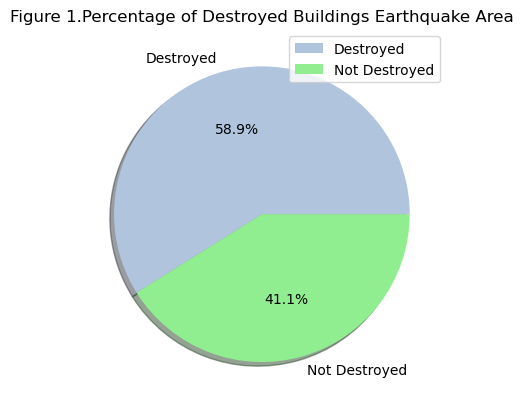

Destroyed        3239
Not destroyed    2260
Name: Damaged?, dtype: int64

In [8]:
my_colors = ['lightsteelblue','lightgreen']
my_labels = ['Destroyed','Not Destroyed']

plt.pie(Feb6["Damaged?"].value_counts(),labels= my_labels,autopct='%1.1f%%', colors=my_colors, shadow=True)
plt.title("Figure 1.Percentage of Destroyed Buildings Earthquake Area")
plt.legend()
plt.show()
Feb6["Damaged?"].value_counts()

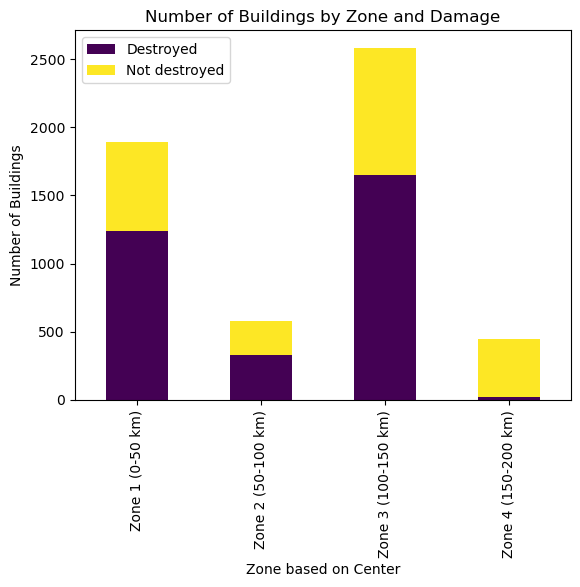

In [9]:
# Count the occurrences of each combination of 'Damaged?' and 'Zone based on Center'
counts = Feb6.groupby(['Zone based on Center', 'Damaged?']).size().unstack()

# Plot the multiple bar plot
ax = counts.plot(kind='bar', stacked=True, colormap='viridis')

# Set plot labels and title
ax.set_xlabel('Zone based on Center')
ax.set_ylabel('Number of Buildings')
ax.set_title('Number of Buildings by Zone and Damage')

# Display the legend
plt.legend()

# Show the plot
plt.show()

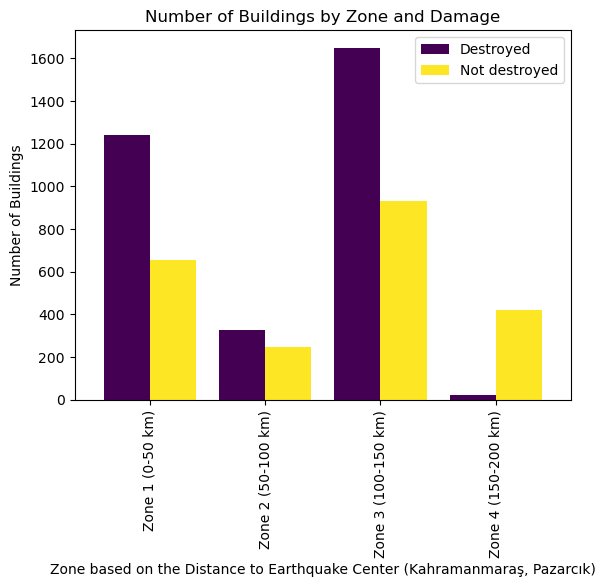

In [10]:
# Count the occurrences of each combination of 'Damaged?' and 'Zone based on Center'
counts = Feb6.groupby(['Zone based on Center', 'Damaged?']).size().unstack()

# Plot the multiple bar plot with side-by-side bars
ax = counts.plot(kind='bar', width=0.8, colormap='viridis')

# Set plot labels and title
ax.set_xlabel('Zone based on the Distance to Earthquake Center (Kahramanmaraş, Pazarcık)')
ax.set_ylabel('Number of Buildings')
ax.set_title('Number of Buildings by Zone and Damage')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [11]:
ist_earthquake = pd.read_excel("/Users/berrakarayel/Desktop/Istanbul houses.xlsx")

In [12]:
ist_earthquake.head(10)

,ID,Type,Damaged?,Distance to Center (km),Distance to Fault Line (km),Name of the Building,Zone based on Center
0,1581342,house,NaN,66.216722,60.083594,Fransız Konsolosluğu,Zone 3 (60-90 km)
1,3705453,house,NaN,71.603001,65.460698,NaN,Zone 3 (60-90 km)
2,112676067,house,NaN,66.186287,60.053047,NaN,Zone 3 (60-90 km)
3,112676080,house,NaN,66.212932,60.079799,NaN,Zone 3 (60-90 km)
4,112676092,house,NaN,66.178390,60.045137,NaN,Zone 3 (60-90 km)
5,167449851,house,NaN,73.257534,67.147162,Mithat Alam Film Merkezi,Zone 3 (60-90 km)
6,237686847,house,NaN,70.640889,64.498444,NaN,Zone 3 (60-90 km)
7,237983119,house,NaN,71.174404,65.032489,NaN,Zone 3 (60-90 km)
8,246599294,house,NaN,75.353107,69.224321,NaN,Zone 3 (60-90 km)
9,246599295,house,NaN,75.365893,69.237104,NaN,Zone 3 (60-90 km)


In [13]:
ist_earthquake.shape

(12947, 7)

In [14]:
ist_earthquake.describe()

,ID,Damaged?,Distance to Center (km),Distance to Fault Line (km)
count,1.294700e+04,0.0,12947.000000,12947.000000
mean,6.542376e+08,NaN,69.488353,63.638091
std,2.112715e+08,NaN,21.220945,21.071842
min,1.581342e+06,NaN,27.424645,23.350496
25%,5.393145e+08,NaN,46.115718,40.426282
50%,6.594255e+08,NaN,71.812247,65.669621
75%,8.943105e+08,NaN,78.901459,72.993503
max,1.226791e+09,NaN,123.305624,117.160642


### Testing the Different Supervised Machine Learning Algorithms

In [15]:
X = Feb6[["Distance to Fault Line (km)","Distance to Center (km)"]]
y = Feb6["Damaged?"]

In [16]:
X_train, X_test, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

#### Support Vector Machine

In [17]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, ytrain)
ypred2=svm.predict(X_test)
accuracy_score(ytest,ypred2)
print(classification_report(ytest,ypred2))

               precision    recall  f1-score   support

    Destroyed       0.74      0.97      0.84       654
Not destroyed       0.92      0.51      0.66       446

     accuracy                           0.78      1100
    macro avg       0.83      0.74      0.75      1100
 weighted avg       0.81      0.78      0.77      1100



#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train,ytrain)
y_pred=log_reg.predict(X_test)
print(classification_report(ytest,y_pred))

               precision    recall  f1-score   support

    Destroyed       0.69      0.97      0.81       654
Not destroyed       0.88      0.37      0.52       446

     accuracy                           0.73      1100
    macro avg       0.79      0.67      0.67      1100
 weighted avg       0.77      0.73      0.69      1100



#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(X_train,ytrain)
ypred1=random_forest.predict(X_test)
print(classification_report(ytest,ypred1))

               precision    recall  f1-score   support

    Destroyed       0.97      0.99      0.98       654
Not destroyed       0.98      0.95      0.96       446

     accuracy                           0.97      1100
    macro avg       0.97      0.97      0.97      1100
 weighted avg       0.97      0.97      0.97      1100



#### K Nearest Neighbor (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k_nearest = KNeighborsClassifier()
k_nearest.fit(X_train, ytrain)
ypred3=k_nearest.predict(X_test)
accuracy_score(ytest,ypred3)
print(classification_report(ytest,ypred3))

               precision    recall  f1-score   support

    Destroyed       0.97      0.98      0.98       654
Not destroyed       0.97      0.96      0.97       446

     accuracy                           0.97      1100
    macro avg       0.97      0.97      0.97      1100
 weighted avg       0.97      0.97      0.97      1100



#### Multinomial NB

In [21]:
from sklearn.naive_bayes import MultinomialNB

multi_nb=MultinomialNB()
multi_nb.fit(X_train,ytrain)
y_pred=multi_nb.predict(X_test)
print(classification_report(ytest,y_pred))

               precision    recall  f1-score   support

    Destroyed       0.71      0.70      0.70       654
Not destroyed       0.57      0.57      0.57       446

     accuracy                           0.65      1100
    macro avg       0.64      0.64      0.64      1100
 weighted avg       0.65      0.65      0.65      1100



#### **Best Fit Model:** Random Forest due to its high F1 score.

### Predictions

In [22]:
X_train = Feb6[["Distance to Fault Line (km)","Distance to Center (km)"]]
y_train = Feb6["Damaged?"]
X_pred = ist_earthquake[["Distance to Fault Line (km)","Distance to Center (km)"]]

In [23]:
X_train.isna().sum()

Distance to Fault Line (km)    0
Distance to Center (km)        0
dtype: int64

In [24]:
y_train.isna().sum()

0

In [25]:
X_pred.isna().sum()

Distance to Fault Line (km)    0
Distance to Center (km)        0
dtype: int64

In [26]:
X_pred

,Distance to Fault Line (km),Distance to Center (km)
0,60.083594,66.216722
1,65.460698,71.603001
2,60.053047,66.186287
3,60.079799,66.212932
4,60.045137,66.178390
...,...,...
12942,70.307297,76.297399
12943,26.352635,27.424645
12944,59.823763,65.941240
12945,76.182539,82.325280


In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
ypred=random_forest.predict(X_pred)

In [28]:
ypred

array(['Not destroyed', 'Not destroyed', 'Not destroyed', ...,
       'Not destroyed', 'Not destroyed', 'Not destroyed'], dtype=object)

In [29]:
ist_earthquake = pd.concat([X.reset_index(drop=True), pd.Series(ypred, name="PredictedSituation")], axis=1)

In [30]:
ist_earthquake['PredictedSituation'].value_counts(normalize=True)

Not destroyed    0.916737
Destroyed        0.083263
Name: PredictedSituation, dtype: float64

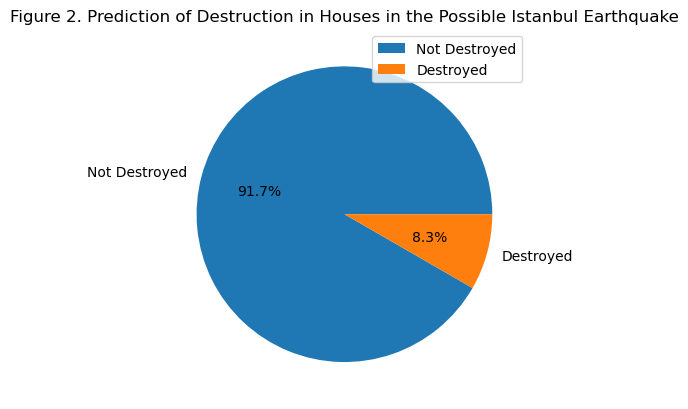

In [34]:
plt.pie(ist_earthquake['PredictedSituation'].value_counts(),labels=['Not Destroyed','Destroyed'],autopct='%1.1f%%')
plt.title("Figure 2. Prediction of Destruction in Houses in the Possible Istanbul Earthquake")
plt.legend()
plt.show()

In [35]:
ist_earthquake.to_csv('ist earthquake with predictions.csv')